In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [180]:
col_names = pd.read_csv('../data/data.csv', nrows=0).columns
dtype_map = {'class' : np.int16, 'year' : np.int16}
dtype_map.update({col: np.float64 for col in col_names if col not in dtype_map})

dtf = pd.read_csv('../data/data.csv', dtype=dtype_map)
al = dtf.shape[0]
print(f"Выборка: {al}")
dup = dtf.drop_duplicates(keep=False, inplace=False)
print(f"Количество дубликатов {al - dup.shape[0]}")

Выборка: 43405
Количество дубликатов 802


In [4]:
percent_missing = dtf.isnull().sum() / dtf.shape[0] * 100.00
missing_value_df = pd.DataFrame({'column_name': dtf.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Attr1,Attr1,0.018431
Attr2,Attr2,0.018431
Attr3,Attr3,0.018431
Attr4,Attr4,0.308720
Attr5,Attr5,0.205046
...,...,...
Attr62,Attr62,0.292593
Attr63,Attr63,0.308720
Attr64,Attr64,1.870752
class,class,0.000000


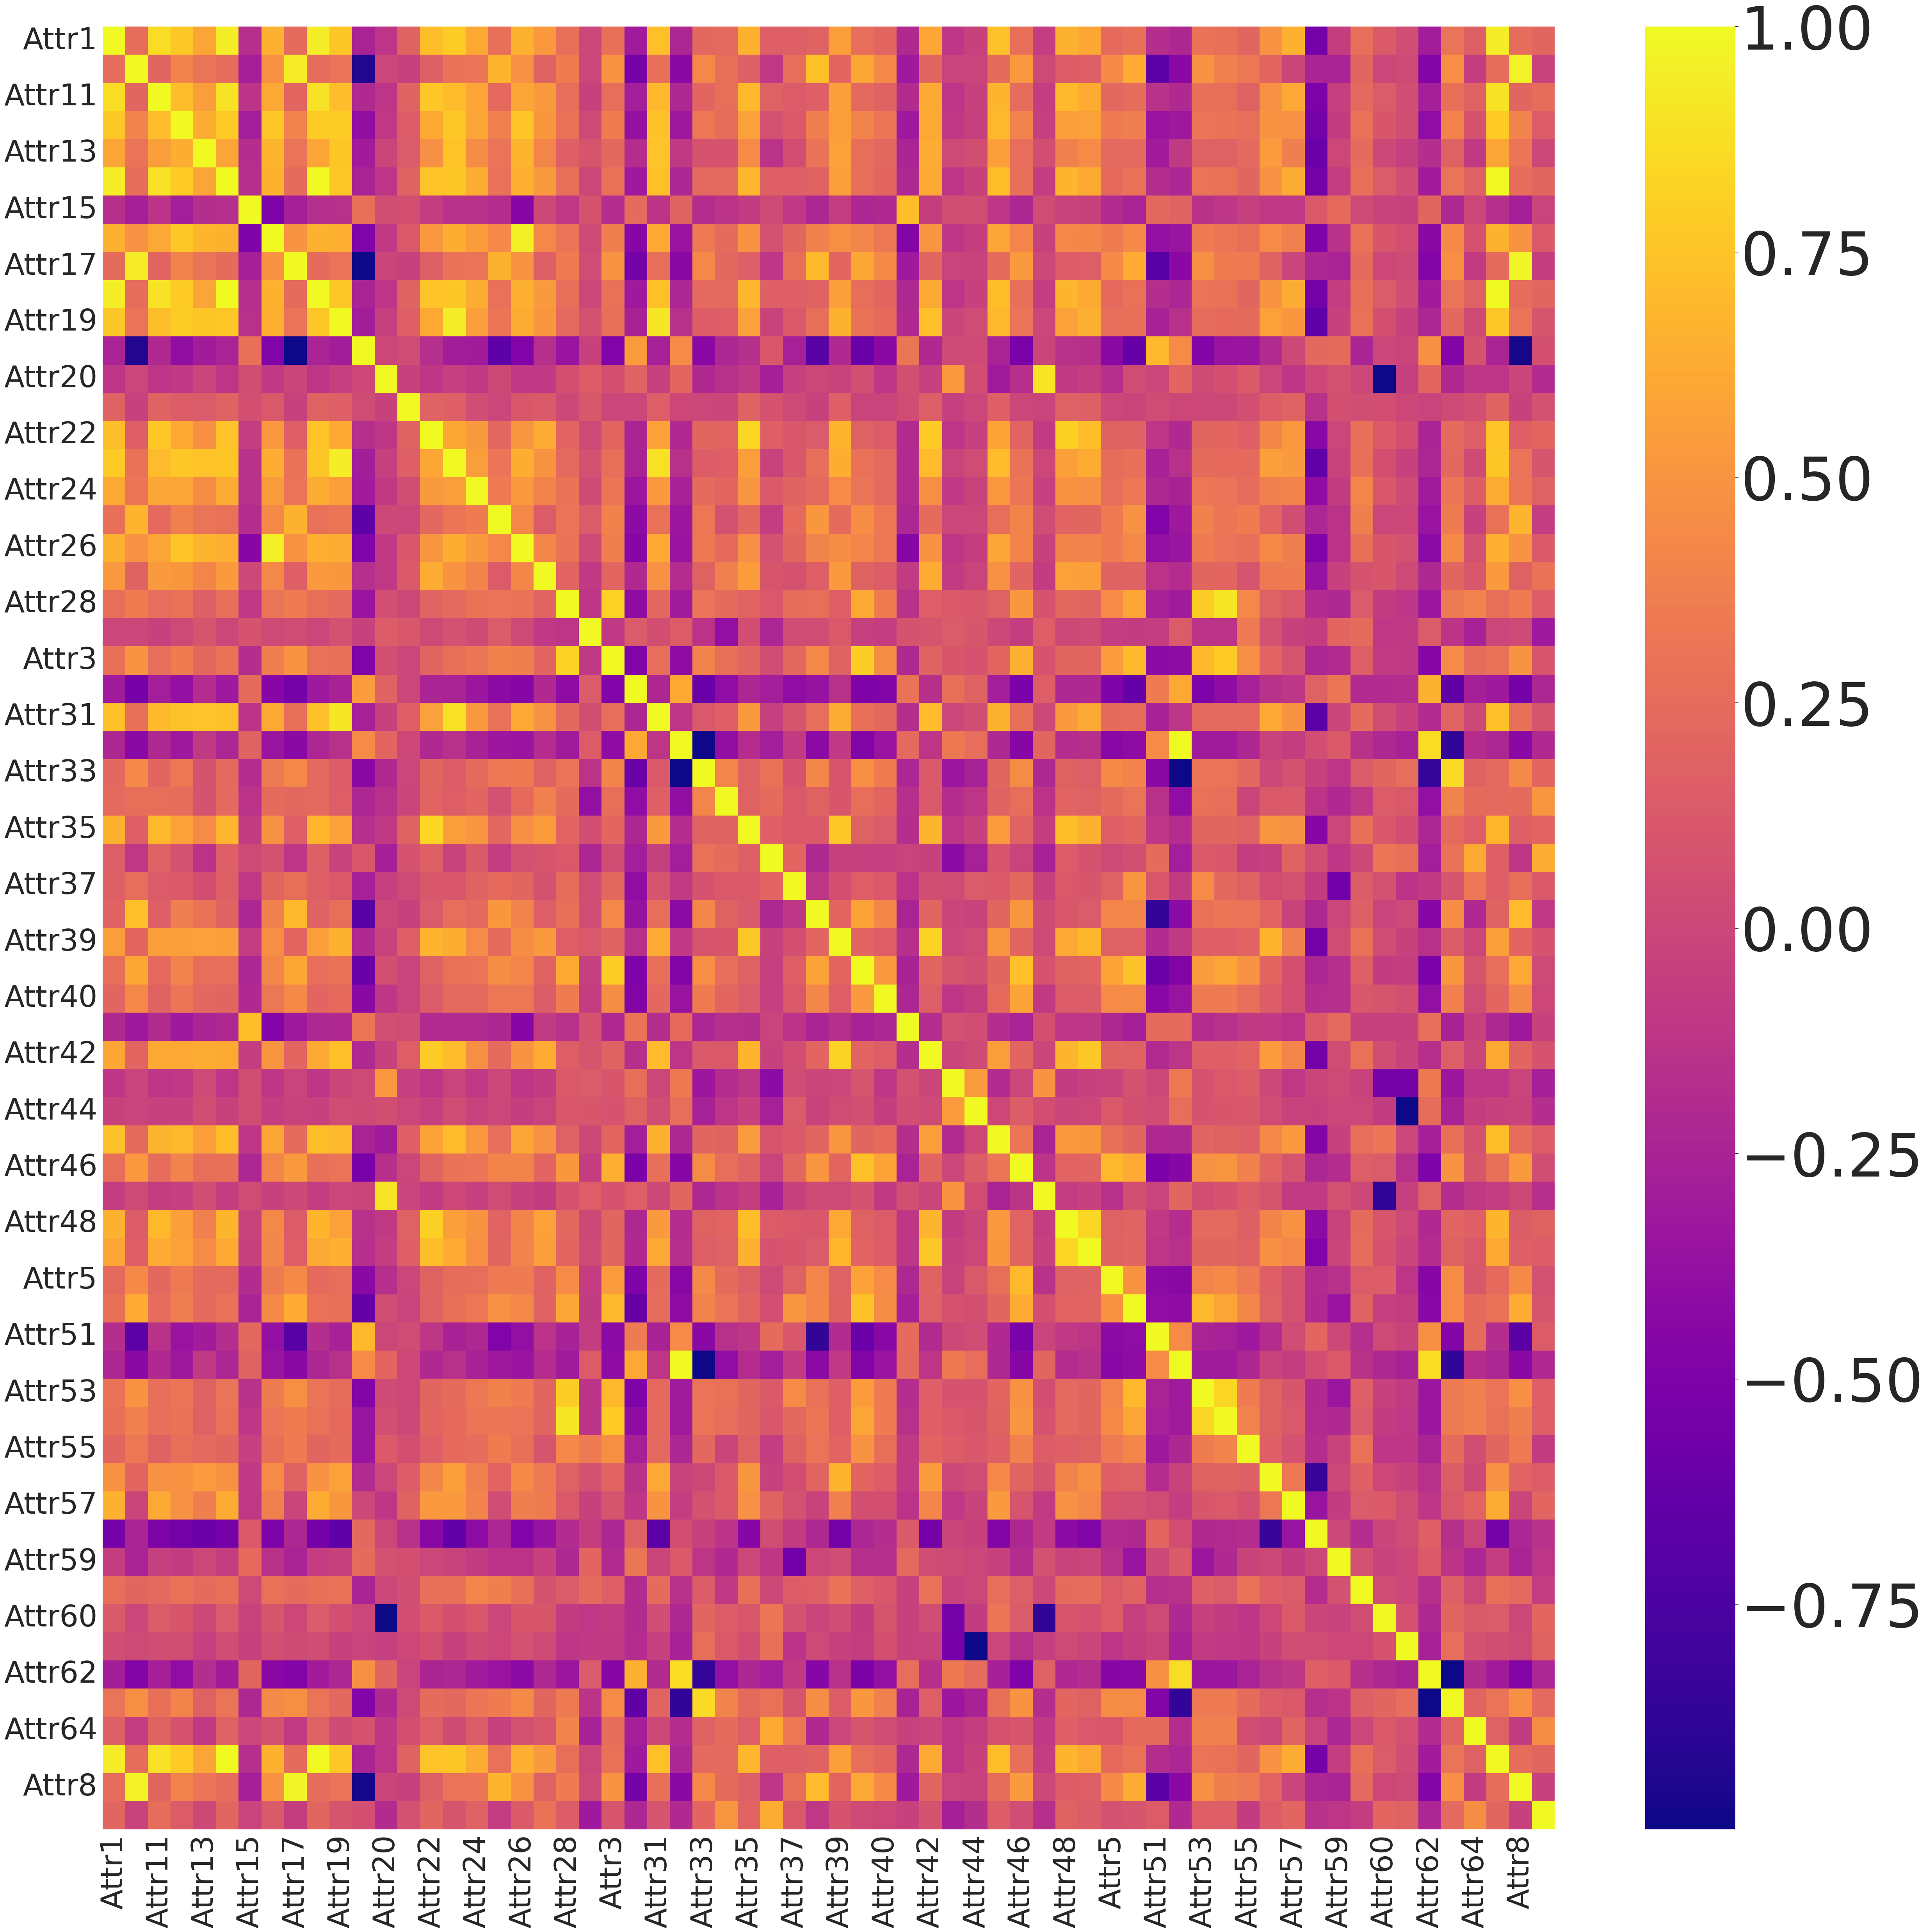

In [83]:
fig, ax = plt.subplots(figsize=(60, 60))
sns.set(font_scale=10)
d = dtf[dtf.columns.difference(['class', 'year'])]
correlation_matrix = d.corr(method='kendall')
sns.heatmap(correlation_matrix, ax=ax, cmap="plasma", fmt="d")
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

<AxesSubplot: xlabel='year', ylabel='Count'>

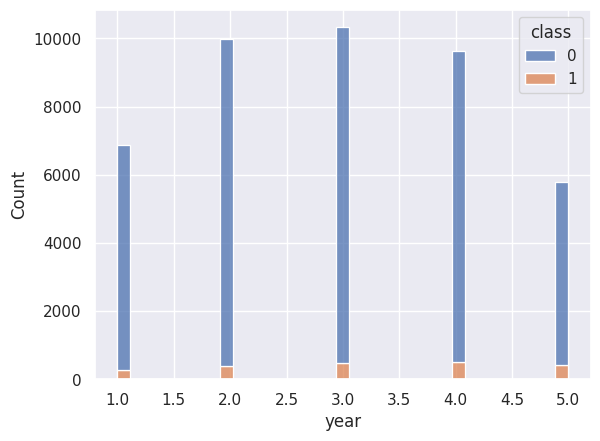

In [84]:
sns.set(font_scale=1)
sns.histplot(
    data=dtf,
    x='year',
    hue='class',
    multiple='stack'
)

<AxesSubplot: xlabel='class', ylabel='year'>

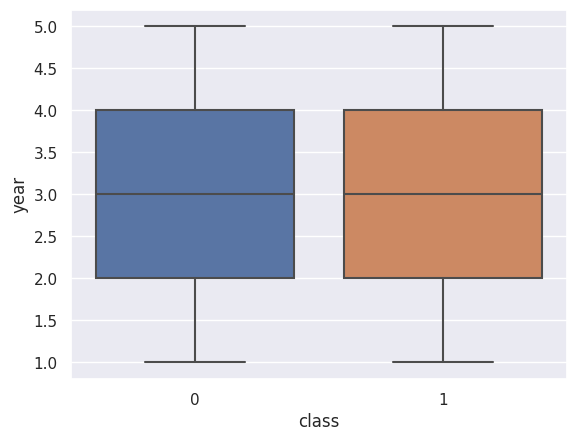

In [59]:
sns.boxplot(data=dtf, x='class', y='year')

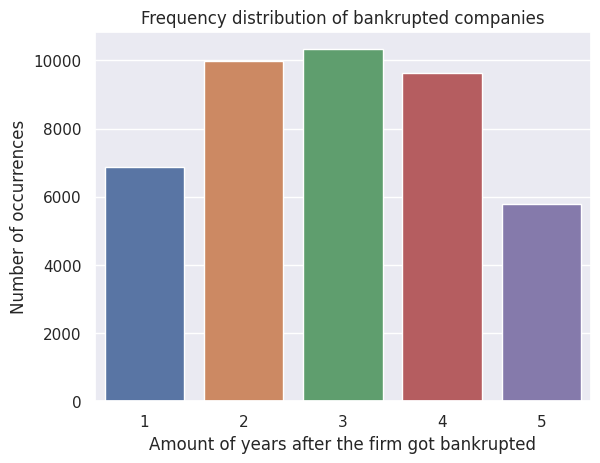

In [85]:

temp = dtf[dtf['year'] > 0]
count = temp['year'].value_counts()
del temp
sns.barplot(x=count.index, y=count.values)
plt.title('Frequency distribution of bankrupted companies')
plt.ylabel('Number of occurrences')
plt.xlabel('Amount of years after the firm got bankrupted')
plt.show()

<AxesSubplot: xlabel='class', ylabel='Attr1'>

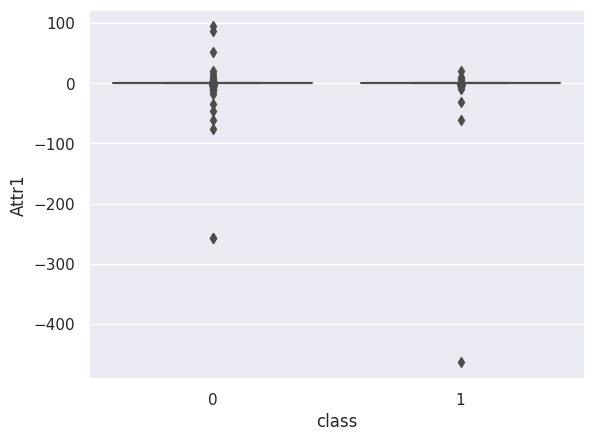

In [181]:
sns.boxplot(data=dtf, x='class', y='Attr1')

In [ ]:
sns.boxplot(data=dtf, x='class', y='Attr7')

<AxesSubplot: xlabel='class', ylabel='count'>

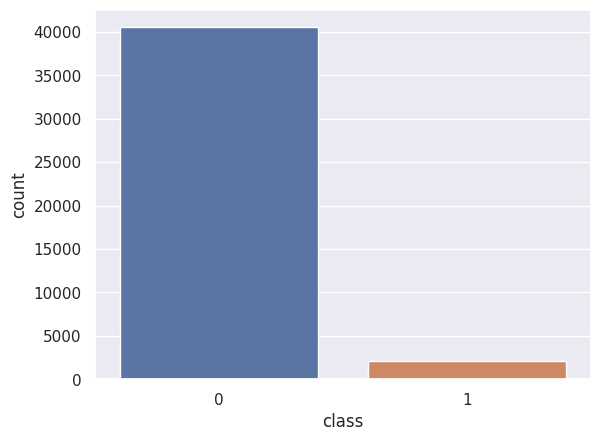

In [89]:
sns.countplot(x=dtf['class'])

In [1]:
sns.countplot(x=dtf['year'], hue=dtf['class'])

NameError: name 'sns' is not defined

<AxesSubplot: xlabel='year', ylabel='Attr7'>

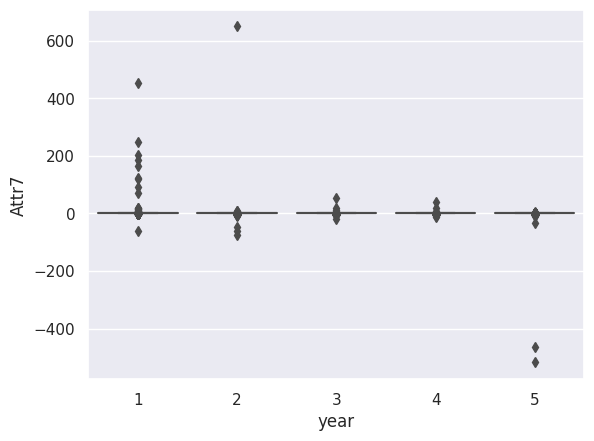

In [94]:
sns.boxplot(data=dtf, x='year', y='Attr7')

<AxesSubplot: xlabel='year', ylabel='Attr8'>

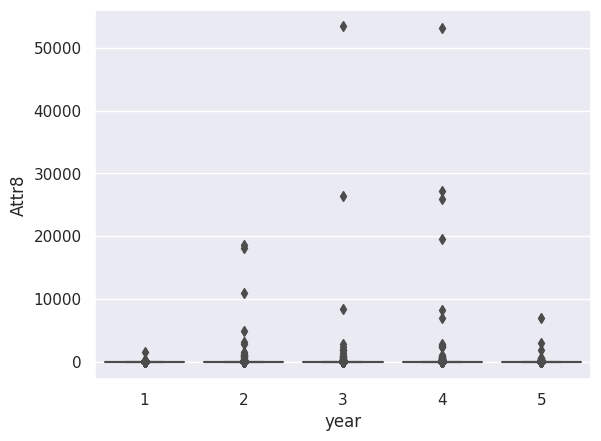

In [95]:
sns.boxplot(data=dtf, x='year', y='Attr8')

<AxesSubplot: xlabel='year', ylabel='Attr9'>

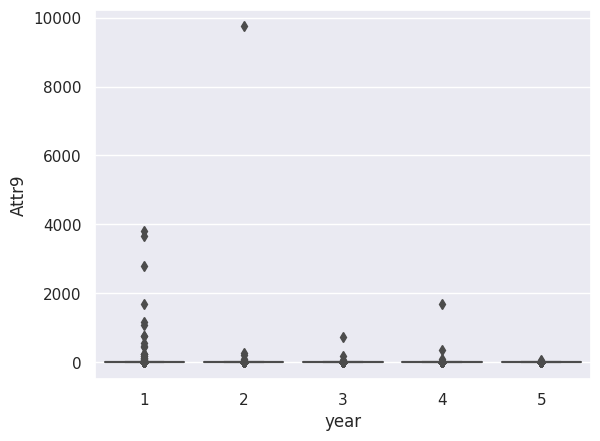

In [96]:
sns.boxplot(data=dtf, x='year', y='Attr9')

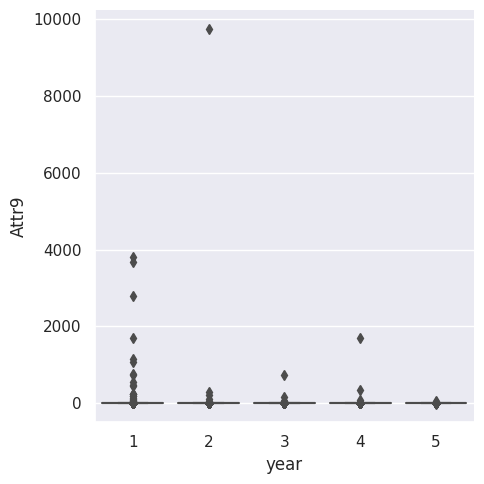

In [101]:
sns.catplot(data=dtf, x="year", y="Attr9", kind="box")


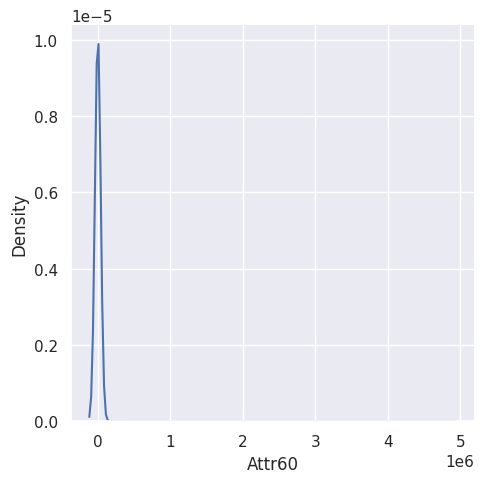

In [139]:
sns.displot(dtf, x='Attr60', kind='kde', bw_adjust=10)

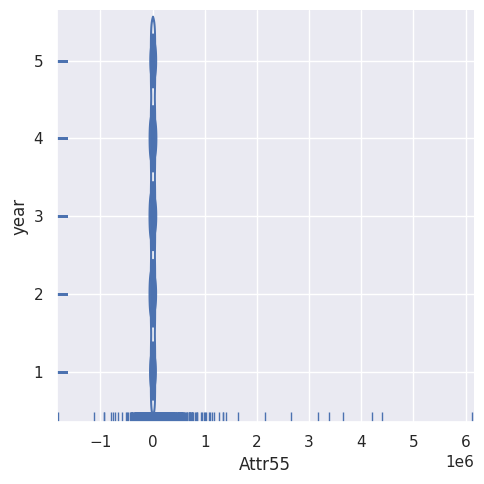

In [141]:
sns.displot(
    dtf, x="Attr55", y="year",
    kind="kde", rug=True
)

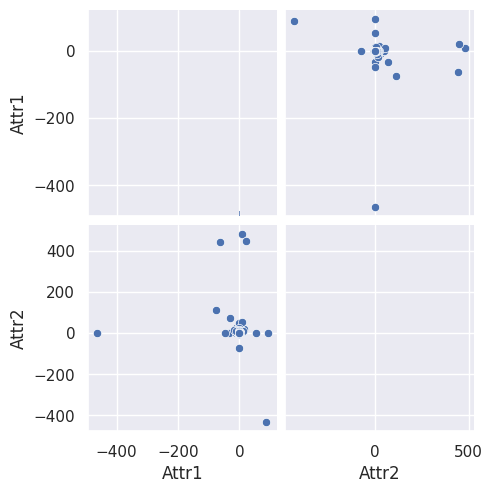

In [176]:
sns.pairplot(dtf[['Attr1', 'Attr2']])

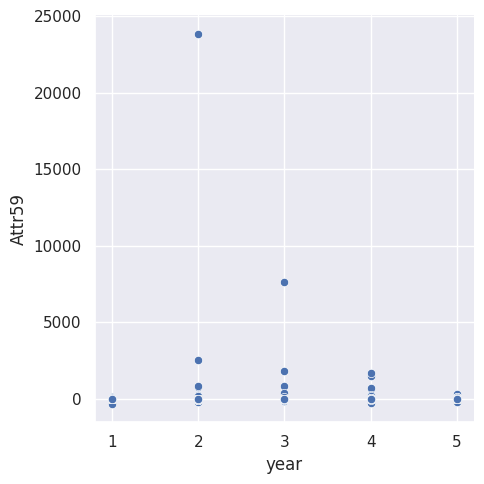

In [156]:
sns.relplot(data=dtf, x="year", y="Attr59")

<AxesSubplot: xlabel='year', ylabel='Attr64'>

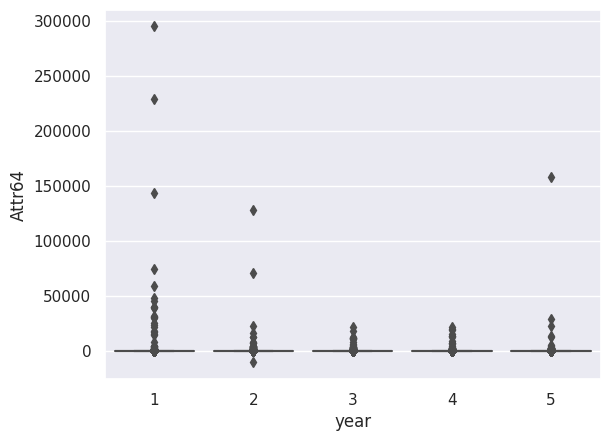

In [173]:
sns.boxplot(data=dtf, y='Attr64', x='year')

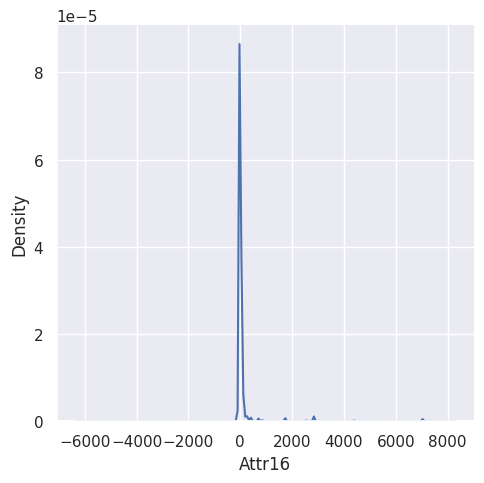

In [259]:
sns.displot(data=dtf, x='Attr16', kind='kde')

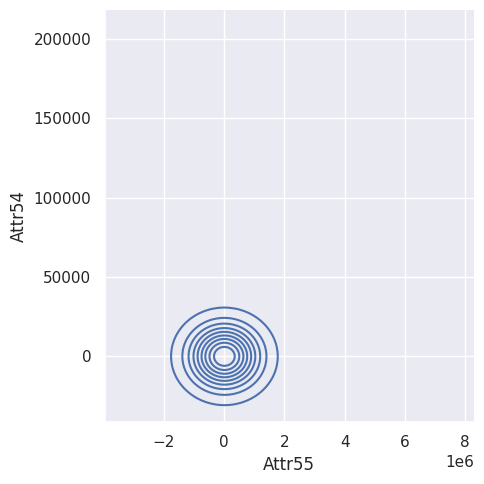

In [257]:
sns.displot(data=dtf, x='Attr55', y='Attr54', kind='kde', bw_adjust=60)

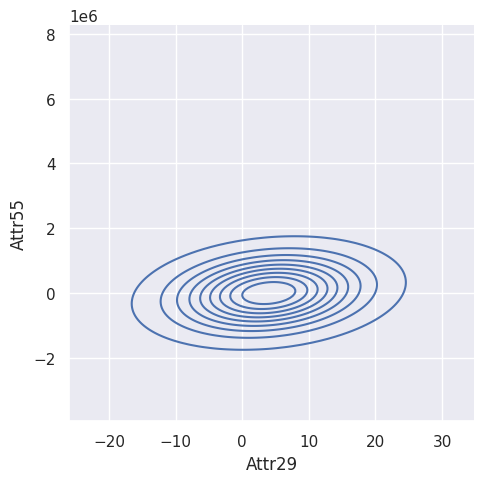

In [258]:
sns.displot(data=dtf, x='Attr29', y='Attr55', kind='kde', bw_adjust=60)

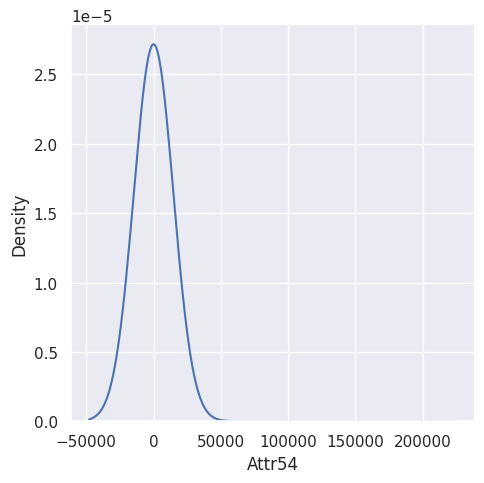

In [265]:
sns.displot(data=dtf, x='Attr54', kind='kde', bw_adjust=100)

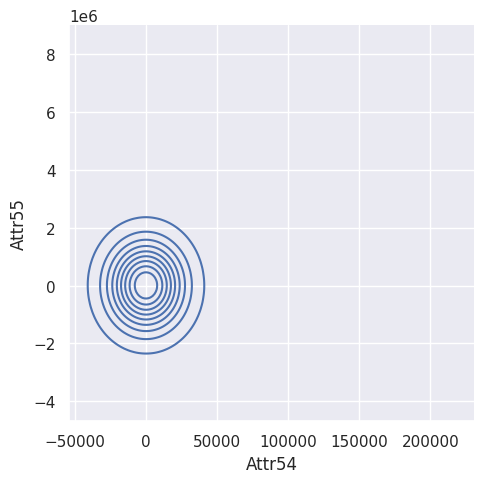

In [268]:
sns.displot(data=dtf, x='Attr54', y='Attr55', kind='kde', bw_adjust=80)

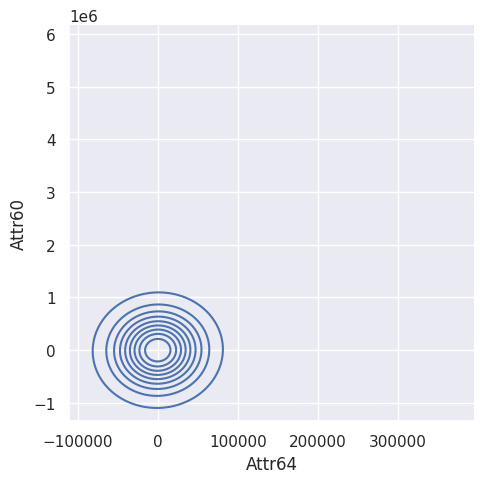

In [269]:
sns.displot(data=dtf, x='Attr64', y='Attr60', kind='kde', bw_adjust=80)

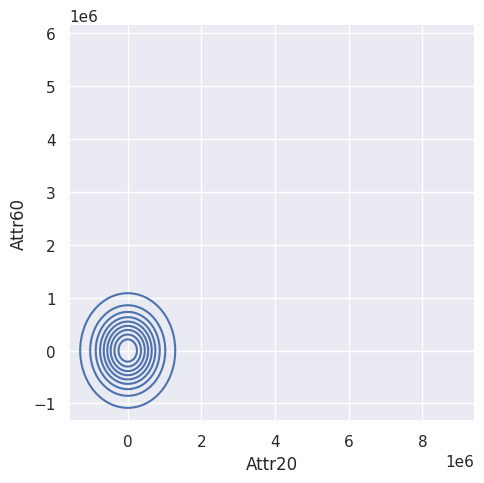

In [270]:
sns.displot(data=dtf, x='Attr20', y='Attr60', kind='kde', bw_adjust=80)

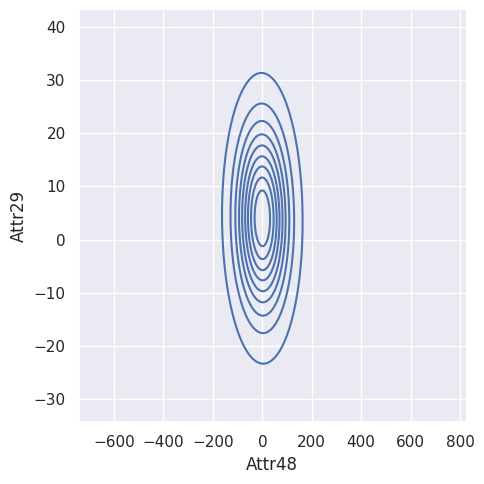

In [275]:
sns.displot(data=dtf, x='Attr48', y='Attr29', kind='kde', bw_adjust=80)

In [11]:
# Drop
dtf.drop_duplicates(keep=False, inplace=True)
dtf.shape

(42603, 66)

In [7]:
# Missing values
missing_values_count = dtf.isnull().sum()
total_cells = np.product(dtf.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
percent_missing

1.449321750708977

In [7]:
missing_values_count[20:40]

Attr21     5818
Attr22        8
Attr23      123
Attr24      922
Attr25        8
Attr26       93
Attr27     2736
Attr28      796
Attr29        8
Attr30      123
Attr31      123
Attr32      364
Attr33      132
Attr34       92
Attr35        8
Attr36        8
Attr37    18688
Attr38        8
Attr39      123
Attr40      132
dtype: int64

In [9]:
dtf.bfill(axis='rows', inplace=True)
missing_values_count = dtf.isnull().sum()
total_cells = np.product(dtf.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
percent_missing

0.0

In [24]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
dtf = pd.DataFrame(imp.fit_transform(dtf))
dtf

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0,1.0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0,1.0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0,1.0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0,1.0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42598,0.002861,0.58067,-0.223860,0.51658,-31.8660,0.002861,0.002861,0.618550,1.01200,0.359170,...,0.007966,0.98817,0.327360,38.1420,39.1500,42.202,8.6489,5.2646,1.0,3.0
42599,-0.051968,0.55254,0.147150,2.16980,12.7480,-0.051968,-0.034361,0.669830,0.94694,0.370110,...,-0.140410,1.05600,1.153000,14.4930,9.2851,32.761,11.1410,1.9276,1.0,3.0
42600,-0.135900,0.83954,-0.342010,0.46526,-145.3100,-0.219120,-0.131860,0.191130,1.09990,0.160460,...,-0.846930,0.85427,0.814200,6.2737,9.6966,212.230,1.7198,1.5659,1.0,3.0
42601,0.009423,0.50028,0.261630,1.52300,-10.1580,0.009423,0.007700,0.989900,1.01230,0.495230,...,0.019027,0.98781,0.000000,5.9675,4.3536,98.240,3.7154,7.8068,1.0,3.0


array([0., 1.])

In [30]:
missing_values_count = dtf.isnull().sum()
total_cells = np.product(dtf.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
percent_missing

0.0

In [170]:
# Outliers 
import scipy.stats as stats
z = np.abs(stats.zscore(dtf))
z[64] = 0
data_clean = dtf[(z <= 2).all(axis = 1)]
data_clean.shape

(39506, 66)

In [203]:
dtf.shape[0] - data_clean.shape[0] 

3899

In [171]:
headers = ['Attr' + str(i) for i in range(1, 65)] + ['class', 'year']
mapper = {}
for i in range(len(headers)):
    mapper[i] = headers[i]
data_clean.rename(columns=mapper, inplace=True)
data_clean.columns

/tmp/ipykernel_16343/2902412427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.rename(columns=mapper, inplace=True)


Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class', 'year'],
      dtype='object')

In [172]:
data_clean['class'].value_counts()

0.0    37639
1.0     1867
Name: class, dtype: int64

In [179]:
dtf.describe()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
count,42603.000000,42603.000000,42603.000000,42603.000000,4.260300e+04,42603.000000,42603.000000,42603.000000,42603.000000,42603.000000,...,42603.000000,4.260300e+04,42603.000000,4.260300e+04,42603.000000,4.260300e+04,42603.000000,42603.000000,42603.000000,42603.000000
mean,0.046505,0.593564,0.112887,6.374324,-3.870608e+02,-0.059126,0.102502,11.407858,2.496126,0.582465,...,-0.009490,3.057247e+01,1.342790,4.563332e+02,17.196718,1.516672e+03,9.393204,72.512072,0.048705,2.941060
std,2.455975,5.896764,5.489736,297.740316,6.174774e+04,7.268014,5.617630,467.954135,57.704492,13.221040,...,13.796297,5.379217e+03,123.235076,3.182893e+04,557.566817,1.403583e+05,125.139873,2364.268116,0.215254,1.282619
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000,1.000000
25%,0.003351,0.271040,0.021592,1.050600,-4.964700e+01,0.000000,0.005712,0.428055,1.019200,0.293815,...,0.014800,8.761400e-01,0.000000,5.735700e+00,4.526450,4.211550e+01,3.106250,2.225000,0.000000,2.000000
50%,0.049637,0.473080,0.197140,1.573800,-1.019700e+00,0.000000,0.059617,1.067700,1.202700,0.504740,...,0.120400,9.513900e-01,0.005990,1.042400e+01,6.670200,7.141700e+01,5.111600,4.443100,0.000000,3.000000
75%,0.129870,0.690085,0.403860,2.800350,5.070750e+01,0.086027,0.151265,2.606800,2.078650,0.707235,...,0.286190,9.928900e-01,0.237220,2.410850e+01,10.489500,1.175400e+02,8.671800,10.629500,0.000000,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000,5.000000


In [177]:
data_clean.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
count,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,...,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000
mean,0.066277,0.514030,0.193257,2.851698,-3.307118,0.020025,0.080391,2.931020,1.703429,0.469107,...,0.149869,1.722430,0.308155,84.849395,11.185527,140.489345,7.672372,20.224960,0.047259,2.927454
std,0.185375,0.382879,0.365226,5.686494,2707.132530,0.378356,0.197888,10.703612,1.301451,0.395456,...,1.202955,76.356111,4.473969,839.451587,27.610019,1515.700322,10.746300,99.532512,0.212194,1.287366
min,-3.886200,0.000000,-10.563000,-0.403110,-102660.000000,-11.406000,-3.921000,-2.003200,-1.215700,-11.049000,...,-24.731000,-4.549700,-152.090000,-12.440000,-12.656000,-236.530000,-1.543200,-3.726500,0.000000,1.000000
25%,0.004711,0.276267,0.025193,1.057300,-48.626000,0.000000,0.007502,0.436927,1.021000,0.298095,...,0.018417,0.876903,0.000000,5.675600,4.565475,42.603000,3.159300,2.259300,0.000000,2.000000
50%,0.051394,0.474755,0.197530,1.568200,-1.250650,0.000000,0.061336,1.062950,1.207750,0.503700,...,0.123545,0.950900,0.010484,10.217000,6.687600,71.203500,5.126650,4.402600,0.000000,3.000000
75%,0.130740,0.685675,0.398130,2.752075,49.210000,0.087926,0.151877,2.543425,2.060675,0.702155,...,0.287520,0.991838,0.248070,22.738500,10.400000,115.560000,8.569250,10.056750,0.000000,4.000000
max,4.075300,12.049000,9.630700,285.930000,110960.000000,4.550100,4.075300,793.180000,49.092000,12.602000,...,27.236000,8603.500000,241.830000,47823.000000,1064.700000,190570.000000,252.120000,4744.000000,1.000000,5.000000


<AxesSubplot: xlabel='class', ylabel='Attr1'>

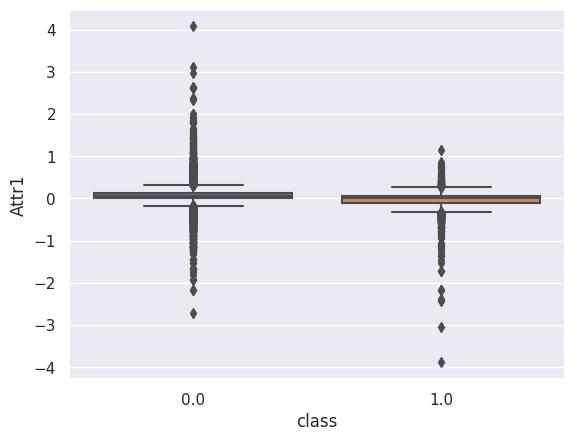

In [182]:
sns.boxplot(data=data_clean, x='class', y='Attr1', dodge=False)

<AxesSubplot: xlabel='year', ylabel='Attr59'>

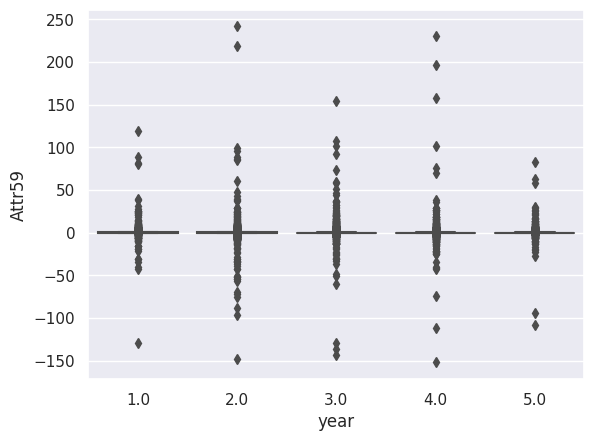

In [178]:
sns.boxplot(data=data_clean, x='year', y='Attr59', dodge=False)

<AxesSubplot: xlabel='year', ylabel='Attr64'>

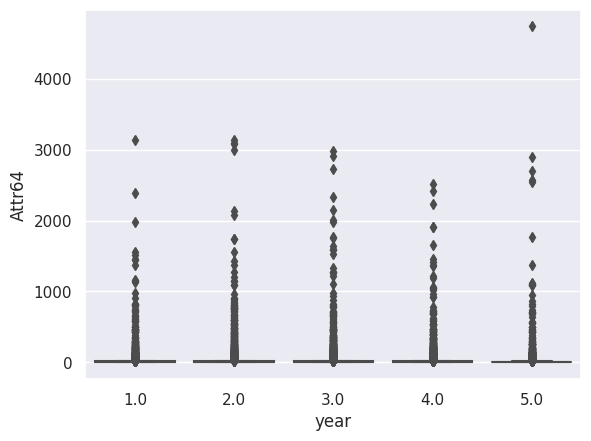

In [183]:
sns.boxplot(data=data_clean, x='year', y='Attr64')

<AxesSubplot: xlabel='class', ylabel='Attr5'>

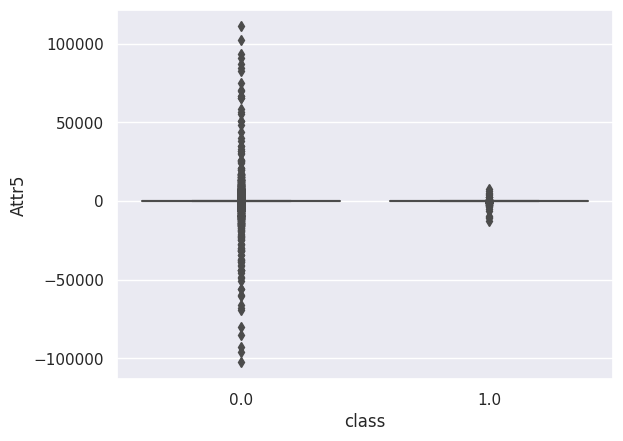

In [184]:
sns.boxplot(data=data_clean, x='class', y='Attr5')

<AxesSubplot: xlabel='year', ylabel='Attr55'>

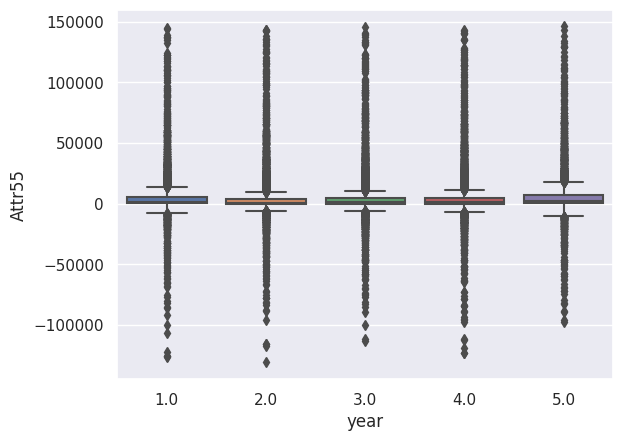

In [185]:
sns.boxplot(data=data_clean, x='year', y='Attr55')

<AxesSubplot: xlabel='year', ylabel='Attr7'>

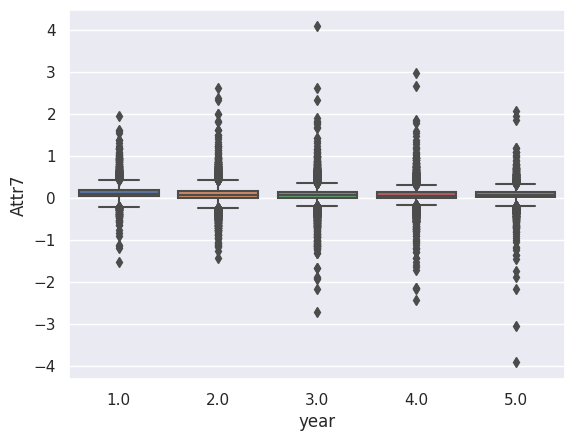

In [186]:
sns.boxplot(data=data_clean, x='year', y='Attr7')

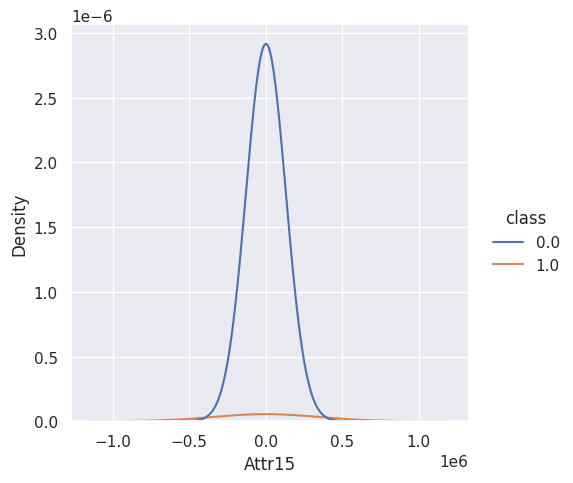

In [187]:
sns.displot(data=data_clean, x='Attr15',hue='class', kind='kde', bw_adjust=100)

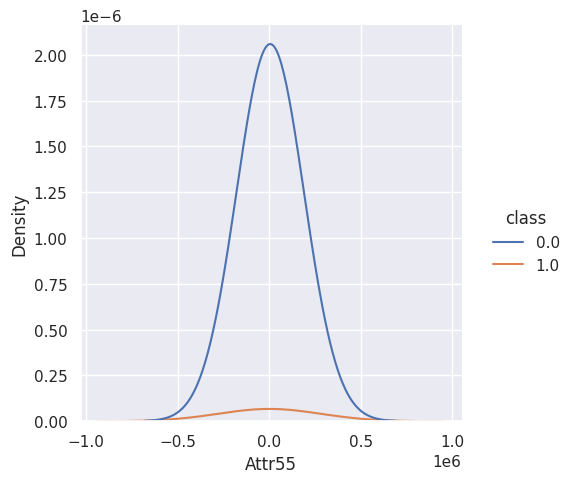

In [188]:
sns.displot(data=data_clean, x='Attr55',hue='class', kind='kde', bw_adjust=100)

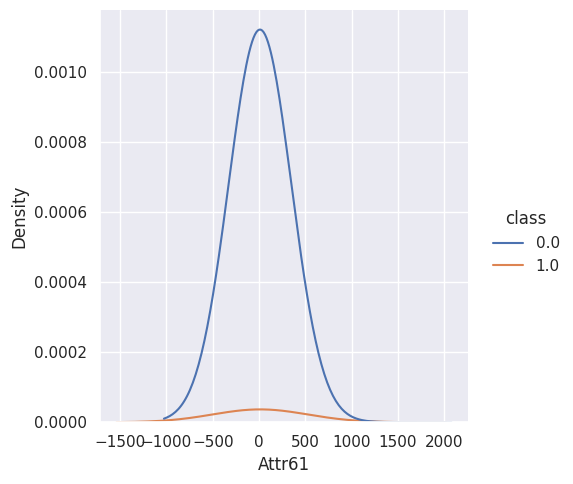

In [189]:
sns.displot(data=data_clean, x='Attr61',hue='class', kind='kde', bw_adjust=100)

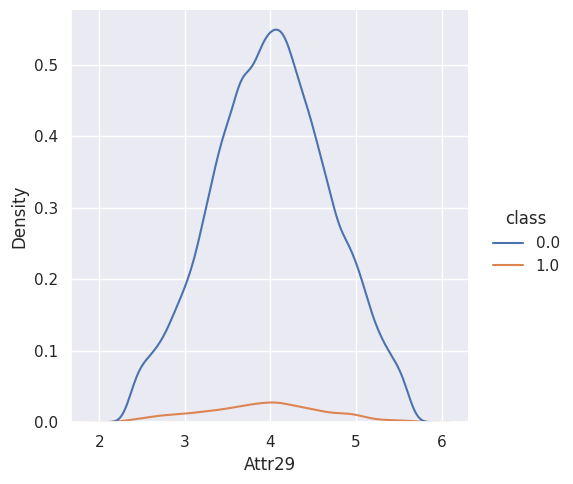

In [191]:
sns.displot(data=data_clean, x='Attr29',hue='class', kind='kde')

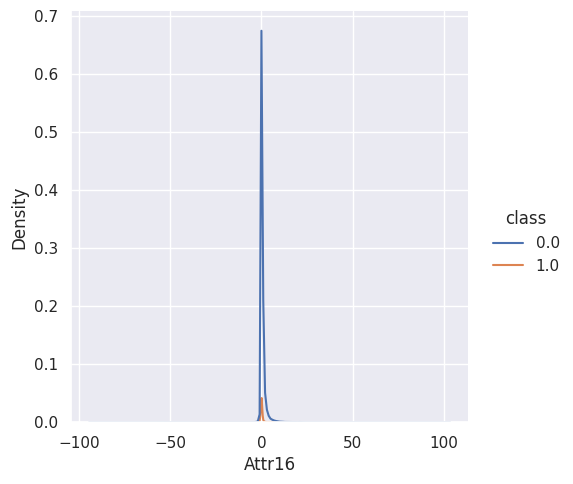

In [198]:
sns.displot(data=data_clean, x='Attr16',hue='class', kind='kde')

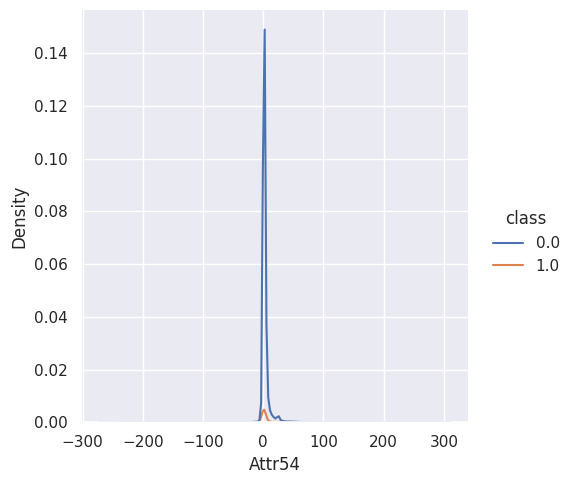

In [199]:
sns.displot(data=data_clean, x='Attr54',hue='class', kind='kde')

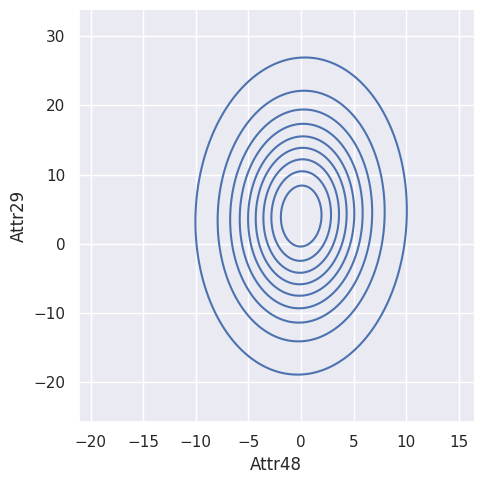

In [195]:
sns.displot(data=data_clean, x='Attr48', y='Attr29', kind='kde', bw_adjust=80)

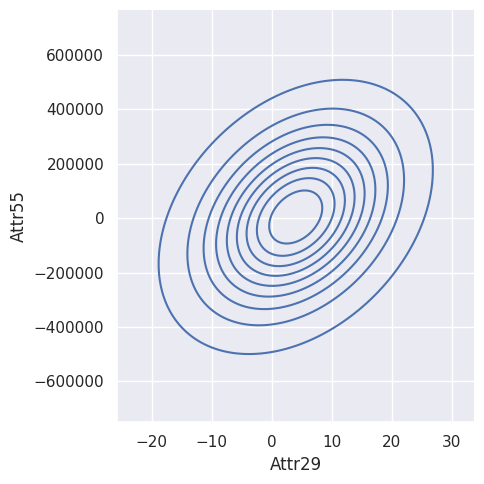

In [196]:
sns.displot(data=data_clean, x='Attr29', y='Attr55', kind='kde', bw_adjust=80)

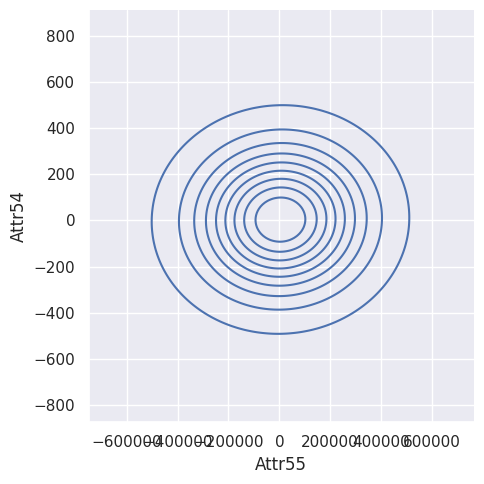

In [197]:
sns.displot(data=data_clean, x='Attr55', y='Attr54', kind='kde', bw_adjust=80)

In [344]:
# Scaling inputs & outputs
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = data_clean.copy()
y = data_scaled[['class', 'year']]
X = data_scaled.drop(['class','year'], axis=1)

data_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index)
data_scaled.rename(columns=mapper, inplace=True)
data_scaled = pd.concat([data_scaled, y], axis=1)
data_scaled.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
count,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,...,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000,39506.000000
mean,0.496449,0.042662,0.532654,0.011367,0.480557,0.716091,0.500405,0.006205,0.058025,0.487003,...,0.478782,0.000729,0.386876,0.002034,0.022130,0.001976,0.036330,0.005045,0.047259,2.927454
std,0.023284,0.031777,0.018086,0.019860,0.012673,0.023712,0.024747,0.013461,0.025870,0.016720,...,0.023148,0.008870,0.011358,0.017549,0.025628,0.007944,0.042364,0.020964,0.212194,1.287366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.488716,0.022929,0.524331,0.005100,0.480345,0.714836,0.491290,0.003069,0.044460,0.479772,...,0.476253,0.000630,0.386094,0.000379,0.015985,0.001463,0.018538,0.001261,0.000000,2.000000
50%,0.494579,0.039402,0.532866,0.006885,0.480567,0.714836,0.498022,0.003856,0.048173,0.488466,...,0.478276,0.000639,0.386120,0.000474,0.017955,0.001613,0.026294,0.001712,0.000000,3.000000
75%,0.504546,0.056907,0.542799,0.011019,0.480803,0.720347,0.509345,0.005718,0.065127,0.496857,...,0.481431,0.000644,0.386723,0.000735,0.021401,0.001845,0.039866,0.002903,0.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


<AxesSubplot: xlabel='year', ylabel='Attr1'>

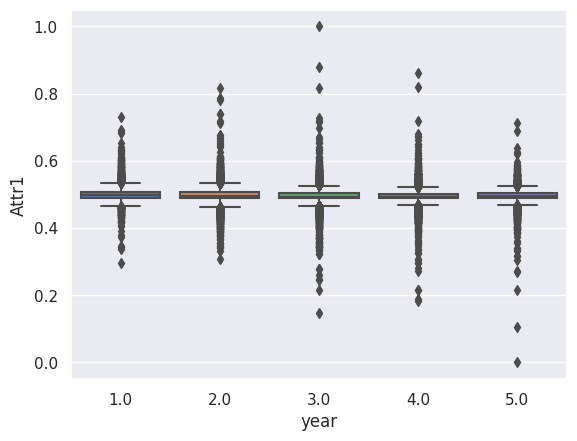

In [346]:
sns.boxplot(data=data_scaled, x='year', y='Attr1')

<AxesSubplot: xlabel='year', ylabel='Attr55'>

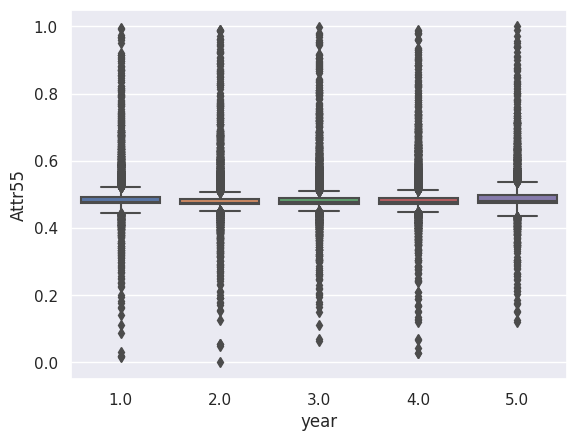

In [348]:
sns.boxplot(data=data_scaled, x='year', y='Attr55')

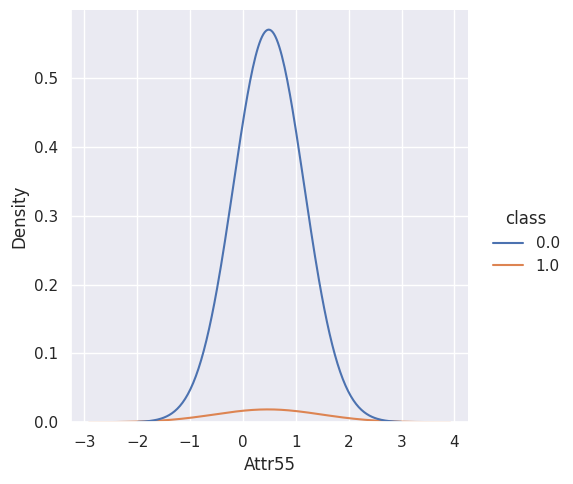

In [349]:
sns.displot(data=data_scaled, x='Attr55',hue='class', kind='kde', bw_adjust=100)

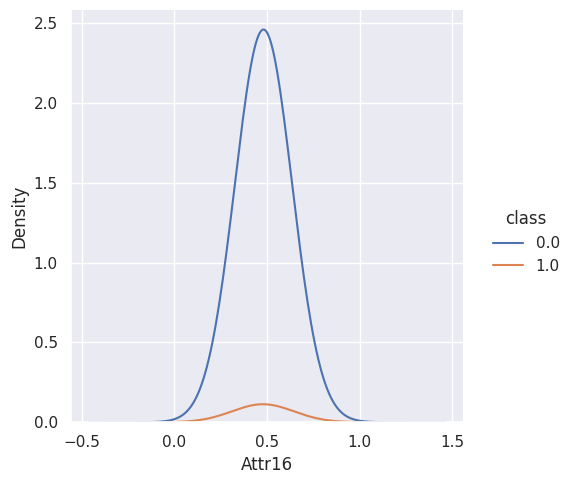

In [350]:
sns.displot(data=data_scaled, x='Attr16',hue='class', kind='kde', bw_adjust=100)

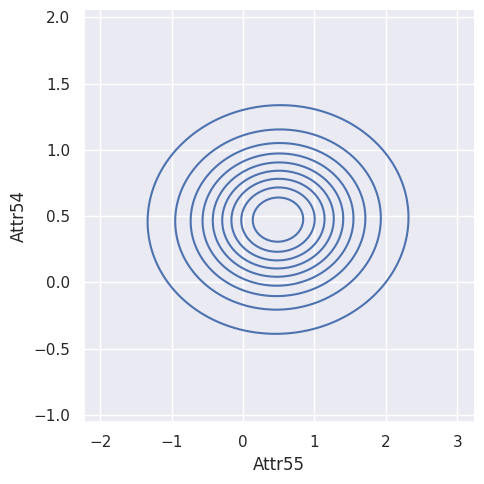

In [351]:
sns.displot(data=data_scaled, x='Attr55', y='Attr54', kind='kde', bw_adjust=80)

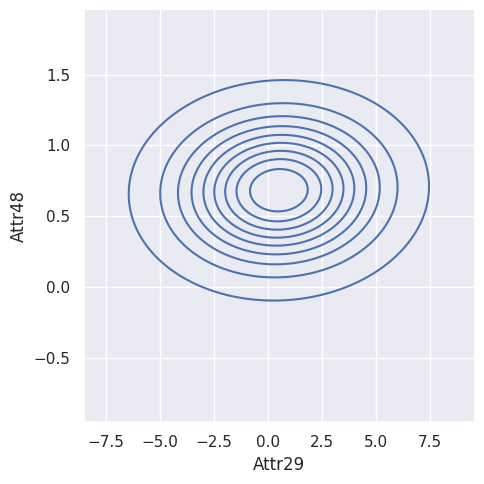

In [352]:
sns.displot(data=data_scaled, x='Attr29', y='Attr48', kind='kde', bw_adjust=80)

In [355]:
data_scaled.to_csv('../data/scaled.scv')

In [353]:
import itertools

# Return dataframe with pairs of attriutes and corresponding Kendall's tau value
# excluding pairs of 2 same attributes:

def corrank(matrix):        
    return pd.DataFrame([[(i,j),matrix.loc[i,j]] for i,j in list(itertools.combinations(matrix, 2))], columns=['pairs','corr'])

In [354]:
corr_matrix = data_scaled[data_scaled.columns.difference(['class', 'year'])].corr(method="kendall")
corr_matrix = corrank(corr_matrix)
print(corr_matrix.sort_values(by='corr',ascending=False))

                 pairs      corr
360    (Attr14, Attr7)  1.000000
308   (Attr14, Attr18)  0.999990
582    (Attr18, Attr7)  0.999990
1296  (Attr32, Attr52)  0.994901
529    (Attr17, Attr8)  0.970312
...                ...       ...
733   (Attr20, Attr60) -0.995166
1333  (Attr33, Attr52) -0.995787
2001  (Attr62, Attr63) -0.998280
1709  (Attr44, Attr61) -0.999215
478    (Attr17, Attr2) -0.999499

[2016 rows x 2 columns]


In [356]:
print(corr_matrix[corr_matrix['corr'].between(0.8, 1, inclusive=True)].sort_values(by='corr',ascending=False)[0:10])

                 pairs      corr
360    (Attr14, Attr7)  1.000000
308   (Attr14, Attr18)  0.999990
582    (Attr18, Attr7)  0.999990
1296  (Attr32, Attr52)  0.994901
529    (Attr17, Attr8)  0.970312
123    (Attr10, Attr8)  0.962578
430   (Attr16, Attr26)  0.957396
60      (Attr1, Attr7)  0.941557
4      (Attr1, Attr14)  0.941557
8      (Attr1, Attr18)  0.941548


/tmp/ipykernel_16343/2103565598.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  print(corr_matrix[corr_matrix['corr'].between(0.8, 1, inclusive=True)].sort_values(by='corr',ascending=False)[0:10])


In [357]:
print(corr_matrix[corr_matrix['corr'].between(-1, -0.8, inclusive=True)].sort_values(by='corr',ascending=False)[0:10])

                 pairs      corr
1939  (Attr56, Attr58) -0.846859
1502  (Attr38, Attr51) -0.858623
1891  (Attr52, Attr63) -0.859158
1308  (Attr32, Attr63) -0.859231
1344  (Attr33, Attr62) -0.860483
1777  (Attr47, Attr60) -0.889038
72     (Attr10, Attr2) -0.933306
688     (Attr2, Attr8) -0.969972
1275  (Attr32, Attr33) -0.990947
733   (Attr20, Attr60) -0.995166


/tmp/ipykernel_16343/2564187837.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  print(corr_matrix[corr_matrix['corr'].between(-1, -0.8, inclusive=True)].sort_values(by='corr',ascending=False)[0:10])


In [358]:
def drop_lin_correlated(df_in, method):
    lower_bound = -0.8
    upper_bound = 0.8
    corr_matrix = df_in.corr(method=method, min_periods=1).abs()
    # the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find indices of feature columns with correlation greater than 0.80
    features_above_max = [column for column in upper.columns if any(upper[column] > upper_bound)]
    # Find indices of feature columns with correlation less than -0.8
    features_below_min = [column for column in upper.columns if any(upper[column] < lower_bound)]
    features_to_drop = features_above_max + features_below_min
    df_out = df_in.drop(features_to_drop, axis=1)

    return df_out

def plot_correlation_bivariate(df, fre1, fre2):
    ax = plt.subplot(111, xlabel=fre1, ylabel=fre2, title='Features correlation')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                  ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    plt.scatter(df[fre1], df[fre2])
    plt.show()

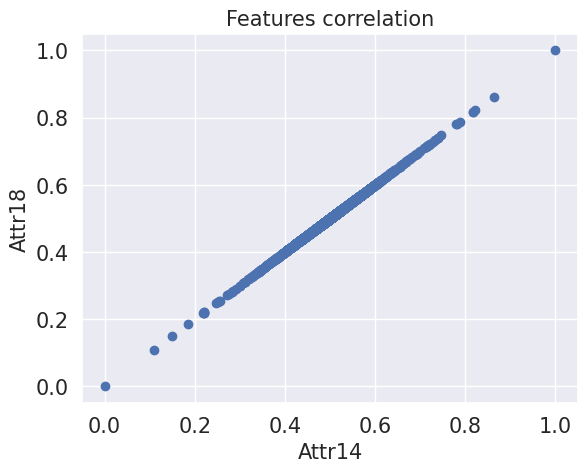

In [359]:
plot_correlation_bivariate(data_scaled, 'Attr14', 'Attr18')

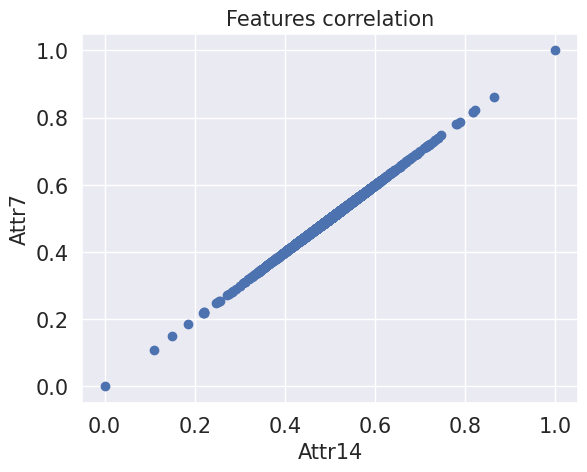

In [360]:
plot_correlation_bivariate(data_scaled, 'Attr14', 'Attr7')

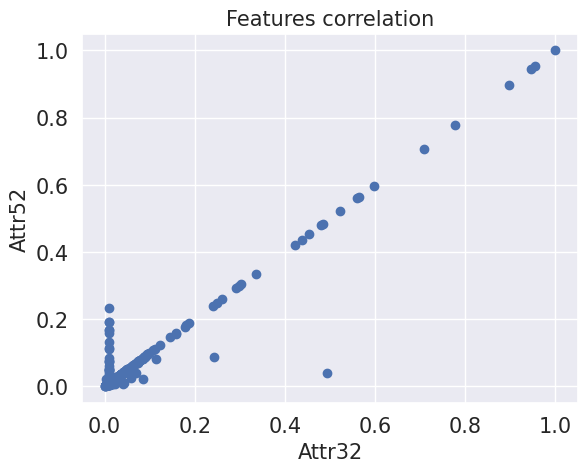

In [361]:
plot_correlation_bivariate(data_scaled, 'Attr32', 'Attr52')

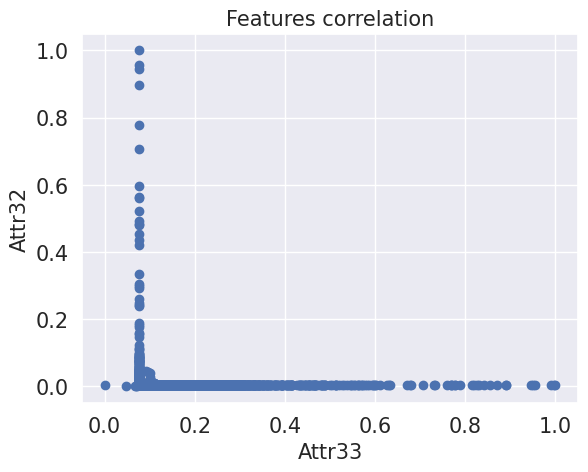

In [362]:
plot_correlation_bivariate(data_scaled, 'Attr33', 'Attr32')

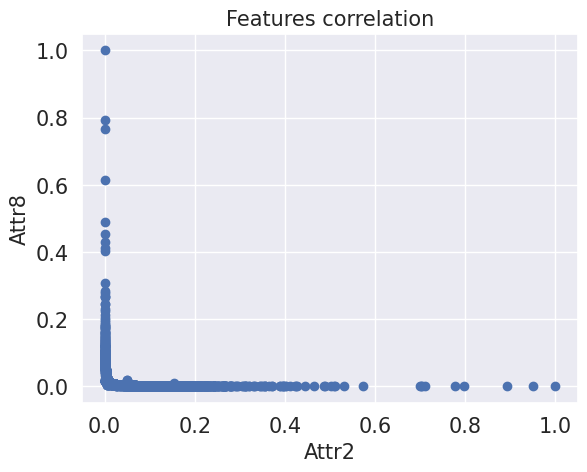

In [363]:
plot_correlation_bivariate(data_scaled, 'Attr2', 'Attr8')

In [364]:
filtered_out_features = drop_lin_correlated(data_scaled[data_scaled.columns.difference(['class', 'year'])], method="kendall")
filtered_out_features.columns.values

/tmp/ipykernel_16343/3833819477.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


array(['Attr1', 'Attr10', 'Attr12', 'Attr13', 'Attr15', 'Attr16',
       'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr24', 'Attr25',
       'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr32', 'Attr34',
       'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr4', 'Attr40',
       'Attr41', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr5',
       'Attr50', 'Attr55', 'Attr56', 'Attr57', 'Attr59', 'Attr6',
       'Attr64', 'Attr9'], dtype=object)

In [366]:
filtered_out_features

,Attr1,Attr10,Attr12,Attr13,Attr15,Attr16,Attr19,Attr20,Attr21,Attr22,...,Attr46,Attr5,Attr50,Attr55,Attr56,Attr57,Attr59,Attr6,Attr64,Attr9
1,0.514391,0.488220,0.498564,0.289558,0.481686,0.479875,0.376778,0.001653,0.257061,0.467292,...,0.081292,0.480642,0.006800,0.480864,0.999691,0.483981,0.386094,0.714836,0.013630,0.057949
2,0.519357,0.480025,0.499226,0.290102,0.481994,0.479474,0.377457,0.001443,0.257060,0.473438,...,0.080654,0.480568,0.003761,0.495407,0.999705,0.491634,0.387858,0.714836,0.001882,0.050185
3,0.498359,0.491418,0.497424,0.289153,0.482320,0.479160,0.376126,0.001537,0.257207,0.452357,...,0.083753,0.480816,0.008717,0.546716,0.999683,0.478632,0.386094,0.724230,0.001954,0.045178
4,0.511652,0.483522,0.497582,0.289327,0.482894,0.478773,0.376483,0.001217,0.261793,0.461688,...,0.080365,0.480539,0.004531,0.484049,0.999692,0.485218,0.386410,0.726576,0.002448,0.047142
5,0.516790,0.488396,0.498935,0.289494,0.481532,0.480131,0.376698,0.001924,0.257623,0.471008,...,0.078037,0.480350,0.005892,0.500043,0.999693,0.484645,0.386152,0.714836,0.003375,0.063495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42598,0.488483,0.482355,0.495859,0.288673,0.487531,0.477777,0.375554,0.000548,0.256223,0.442379,...,0.076666,0.480424,0.001439,0.456942,0.999678,0.476051,0.386925,0.715016,0.001894,0.044281
42599,0.481597,0.482817,0.494380,0.288689,0.498144,0.477402,0.375351,0.000768,0.255740,0.434432,...,0.082820,0.480633,0.001726,0.521239,0.999670,0.473196,0.389021,0.711579,0.001191,0.042988
42600,0.471054,0.473953,0.494735,0.287798,0.473714,0.476331,0.374580,0.001233,0.261793,0.428373,...,0.076655,0.479893,0.001238,0.457262,0.999693,0.459601,0.388161,0.701104,0.001115,0.046029
42601,0.489308,0.488107,0.495908,0.288648,0.497913,0.477405,0.375582,0.001275,0.255785,0.441976,...,0.080047,0.480525,0.005325,0.482244,0.999678,0.476264,0.386094,0.715427,0.002429,0.044287


In [367]:
from sklearn.feature_selection import SelectKBest


def select_k_best(score, X, Y):
    selector = SelectKBest(score, k=20)
    selector.fit_transform(X, Y)
    names = X.columns.values[selector.get_support()]
    scores = selector.scores_[selector.get_support()]
    names_scores = list(zip(names, scores))
    df_reduced = pd.DataFrame(data=names_scores, columns=['feature_names', 'mutual_info'])

    df_reduced = df_reduced.sort_values(['mutual_info', 'feature_names'], ascending=[False, True])
    print(df_reduced)
    return df_reduced.feature_names

In [369]:
from sklearn.feature_selection import mutual_info_classif, f_classif
X = data_scaled.drop(['class'], axis=1)
Y = data_scaled['class']
frs_mi = select_k_best(mutual_info_classif, X, Y)

   feature_names  mutual_info
13        Attr27     0.029998
10        Attr24     0.015281
8         Attr22     0.014644
12        Attr26     0.014545
18        Attr42     0.014155
17        Attr41     0.013682
6         Attr16     0.013666
3         Attr13     0.013421
5         Attr15     0.013225
19        Attr46     0.012611
9         Attr23     0.011978
0          Attr6     0.011812
16        Attr39     0.011803
7         Attr19     0.011021
14        Attr35     0.010284
15        Attr38     0.009771
1         Attr11     0.009734
4         Attr14     0.009558
11        Attr25     0.009505
2         Attr12     0.009465


In [370]:
frs_anova = select_k_best(f_classif, X, Y)

   feature_names  mutual_info
15        Attr38   852.411355
18        Attr51   779.230596
0          Attr1   762.825248
14        Attr35   756.033827
1          Attr2   752.957964
5         Attr10   749.182415
12        Attr25   730.314613
9         Attr18   728.622902
7         Attr14   728.612386
4          Attr7   728.612363
2          Attr3   718.322781
6         Attr11   589.029130
10        Attr22   586.586759
11        Attr24   486.592138
3          Attr6   350.754616
19        Attr55   173.067775
13        Attr26   125.730486
8         Attr16   124.628638
16        Attr39   120.456445
17        Attr48   110.514171


In [376]:
a = set(filtered_out_features) or set(frs_anova) or set(frs_mi)

In [377]:
len(a)

38

In [378]:
f = data_scaled[list(a) + ['class', 'year']]

In [379]:
f.to_csv('../data/fsdata.csv', index=False)

In [380]:
f.shape

(39506, 40)

In [382]:
f.columns

Index(['Attr50', 'Attr37', 'Attr19', 'Attr41', 'Attr9', 'Attr39', 'Attr38',
       'Attr45', 'Attr12', 'Attr21', 'Attr32', 'Attr55', 'Attr34', 'Attr15',
       'Attr59', 'Attr40', 'Attr43', 'Attr25', 'Attr6', 'Attr44', 'Attr28',
       'Attr36', 'Attr4', 'Attr13', 'Attr29', 'Attr24', 'Attr10', 'Attr56',
       'Attr64', 'Attr16', 'Attr30', 'Attr22', 'Attr1', 'Attr5', 'Attr46',
       'Attr20', 'Attr57', 'Attr27', 'class', 'year'],
      dtype='object')